In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
import warnings
import logging

In [2]:
warnings.filterwarnings('ignore')
logging.getLogger('matplotlib').setLevel(logging.ERROR)
logging.getLogger('matplotlib.font_manager').disabled = True

In [3]:
plt.style.use("ggplot")

In [4]:
df = pd.read_csv('heart_disease.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
number_columns = df.select_dtypes(include='number').columns.tolist()
number_columns

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

In [8]:
len(number_columns)

14

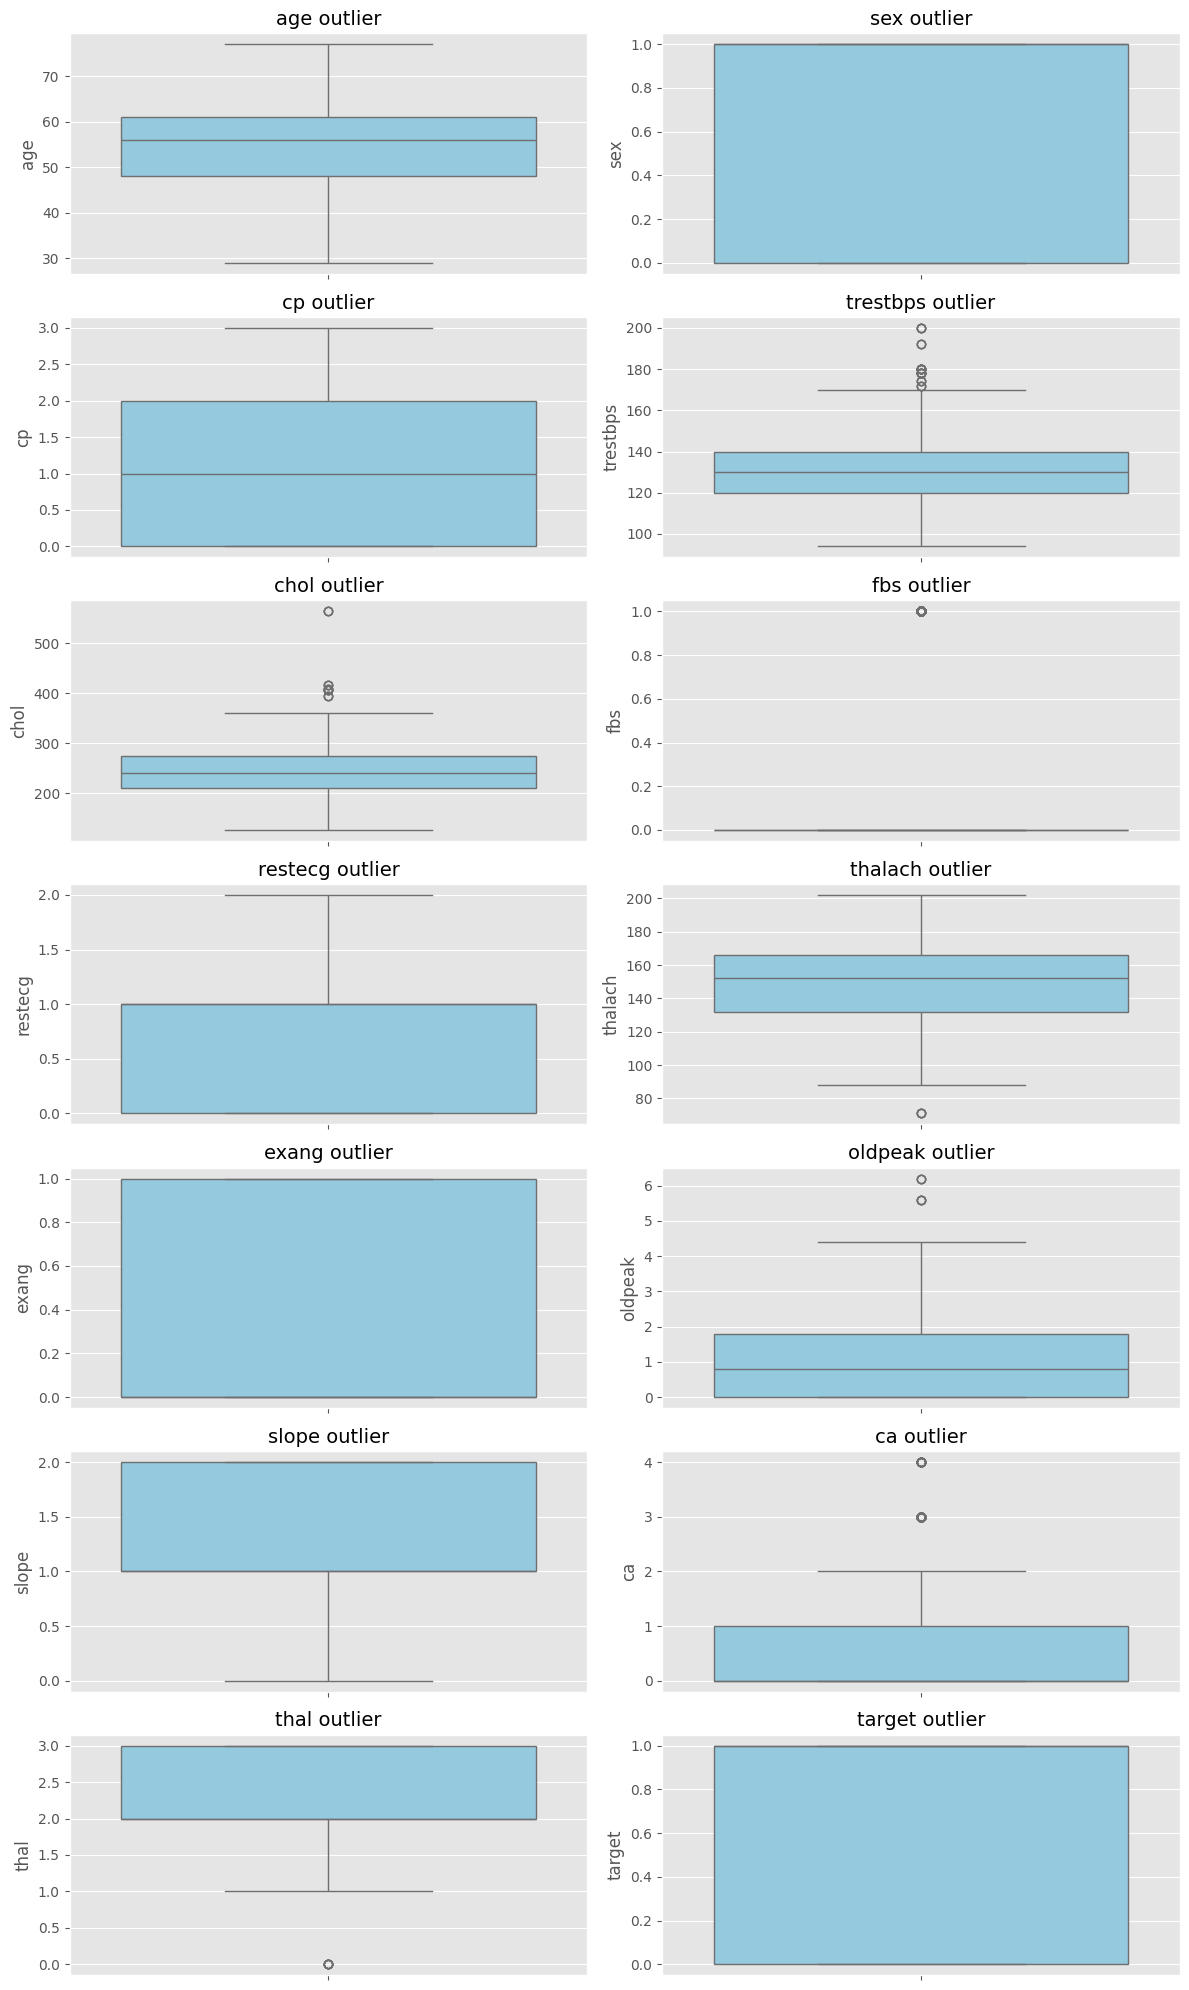

In [9]:
plt.figure(figsize=(12, 20))

for idx, col in enumerate(number_columns, 1):
    plt.subplot(len(number_columns)//2, 2, idx)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'{col} outlier', fontsize=14)
    plt.ylabel(col)

plt.tight_layout()

plt.show()

In [10]:
for col in number_columns:
    
    if col=="fbs":
        continue
        
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.72)

    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

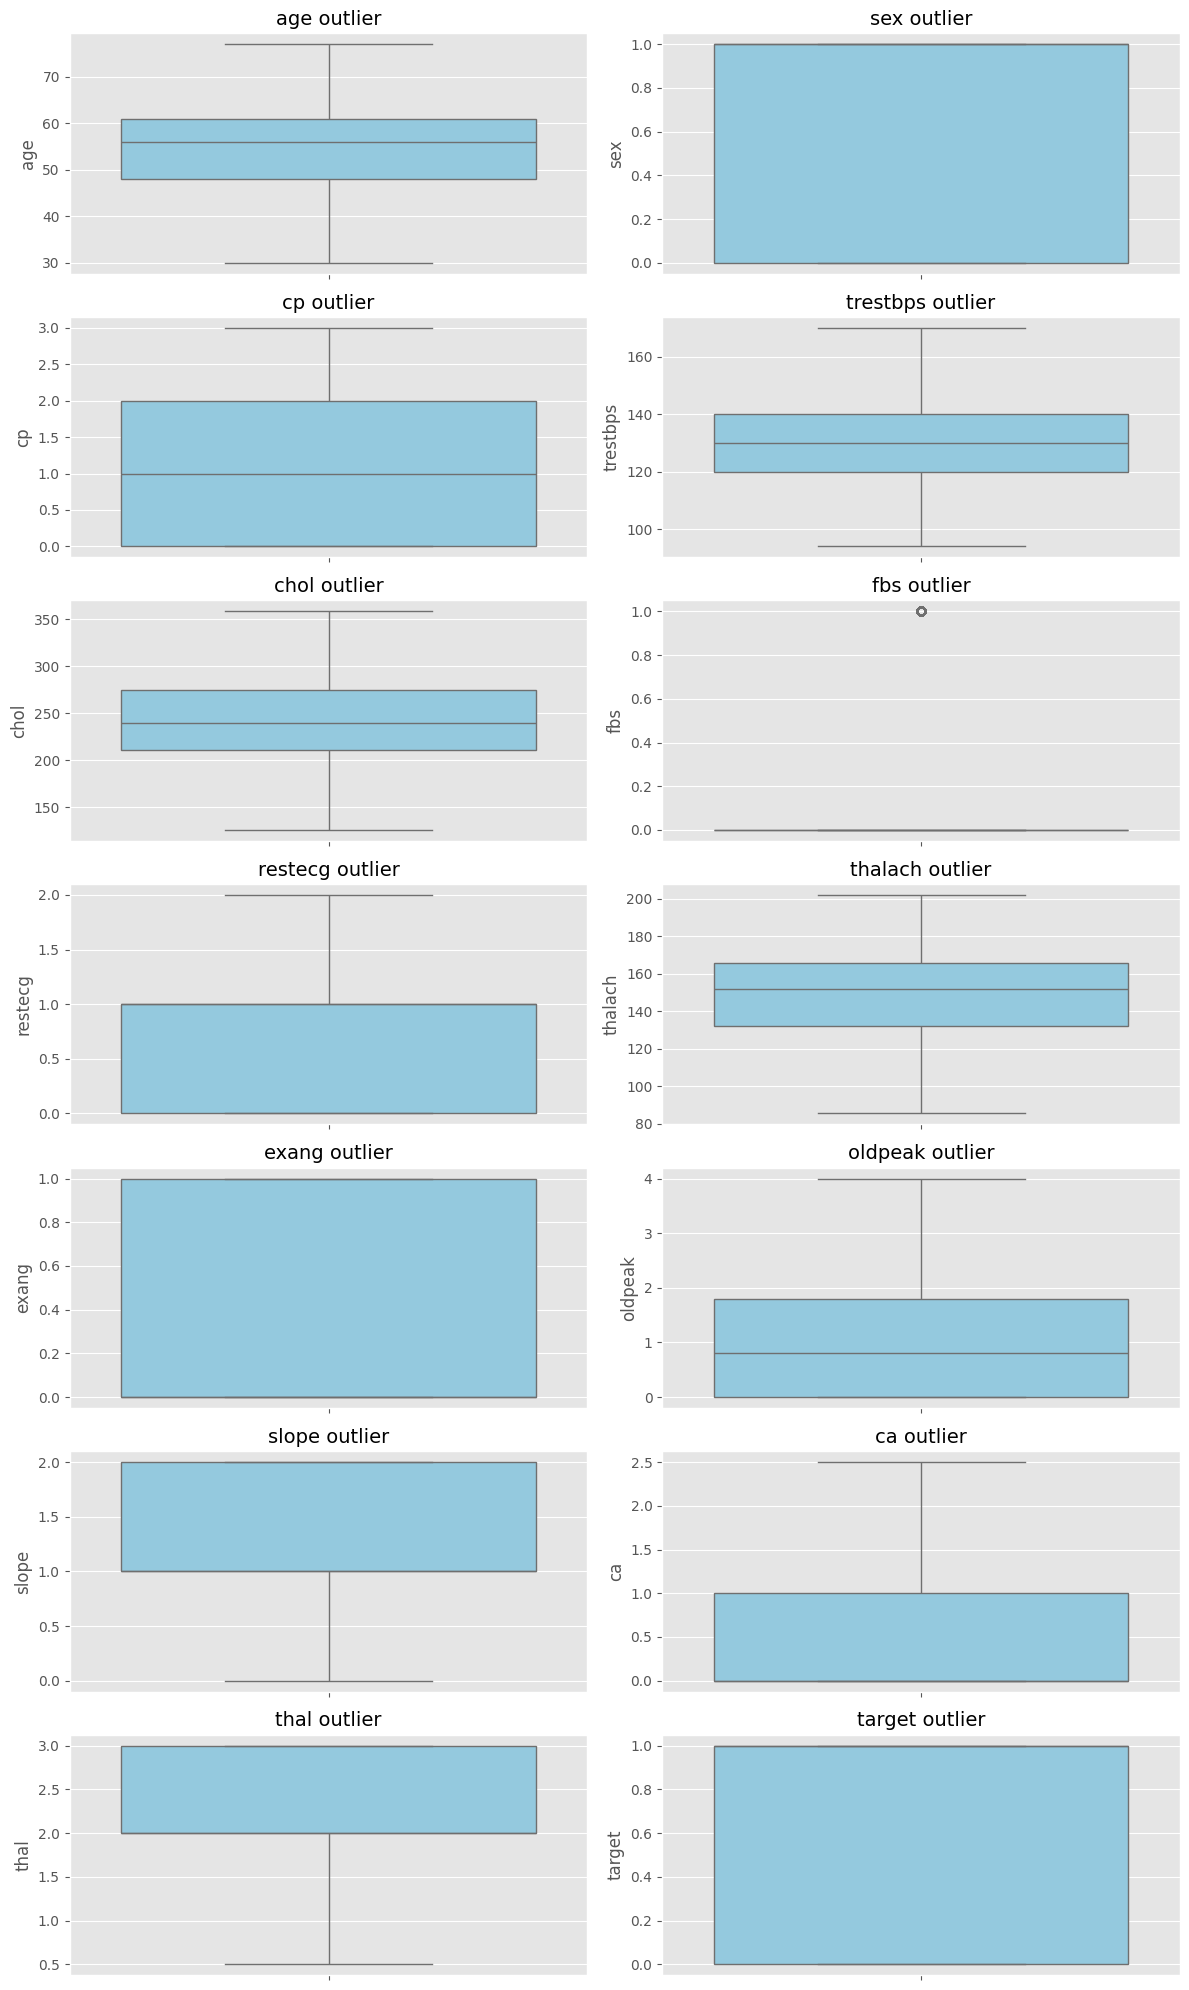

In [11]:
plt.figure(figsize=(12, 20))

for idx, col in enumerate(number_columns, 1):
    plt.subplot(len(number_columns)//2, 2, idx)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'{col} outlier', fontsize=14)
    plt.ylabel(col)

plt.tight_layout()

plt.show()

In [12]:
no_disease = df[df['target'] == 0 ]
no_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212.0,0,1,168.0,0,1.0,2,2.0,3.0,0
1,53,1,0,140,203.0,1,0,155.0,1,3.1,0,0.0,3.0,0
2,70,1,0,145,174.0,0,1,125.0,1,2.6,0,0.0,3.0,0
3,61,1,0,148,203.0,0,1,161.0,0,0.0,2,1.0,3.0,0
4,62,0,0,138,294.0,1,1,106.0,0,1.9,1,2.5,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017,53,1,0,123,282.0,0,1,95.0,1,2.0,1,2.0,3.0,0
1018,41,1,0,110,172.0,0,0,158.0,0,0.0,2,0.0,3.0,0
1021,60,1,0,125,258.0,0,0,141.0,1,2.8,1,1.0,3.0,0
1022,47,1,0,110,275.0,0,0,118.0,1,1.0,1,1.0,2.0,0


In [13]:
disease = df[df['target'] == 1]
disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
5,58,0,0,100,248.0,0,0,122.0,0,1.0,1,0.0,2.0,1
10,71,0,0,112,149.0,0,1,125.0,0,1.6,1,0.0,2.0,1
12,34,0,1,118,210.0,0,1,192.0,0,0.7,2,0.0,2.0,1
15,34,0,1,118,210.0,0,1,192.0,0,0.7,2,0.0,2.0,1
16,51,0,2,140,308.0,0,0,142.0,0,1.5,2,1.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1011,45,1,1,128,308.0,0,0,170.0,0,0.0,2,0.0,2.0,1
1014,44,0,2,108,141.0,0,1,175.0,0,0.6,1,0.0,2.0,1
1019,47,1,0,112,204.0,0,1,143.0,0,0.1,2,0.0,2.0,1
1020,59,1,1,140,221.0,0,1,164.0,1,0.0,2,0.0,2.0,1


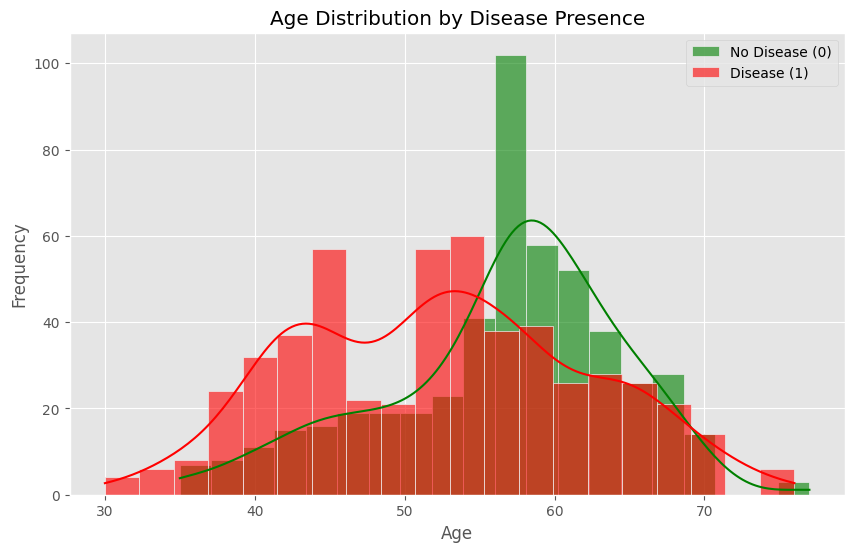

In [15]:
plt.figure(figsize=(10, 6))

sns.histplot(
    no_disease['age'],
    color='green',
    label='No Disease (0)',
    kde=True,
    bins=20,
    alpha=0.6
)

sns.histplot(
    disease['age'],
    color='red',
    label='Disease (1)',
    kde=True,
    bins=20,
    alpha=0.6
)

plt.title('Age Distribution by Disease Presence')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.legend()
plt.grid(True)
plt.show()

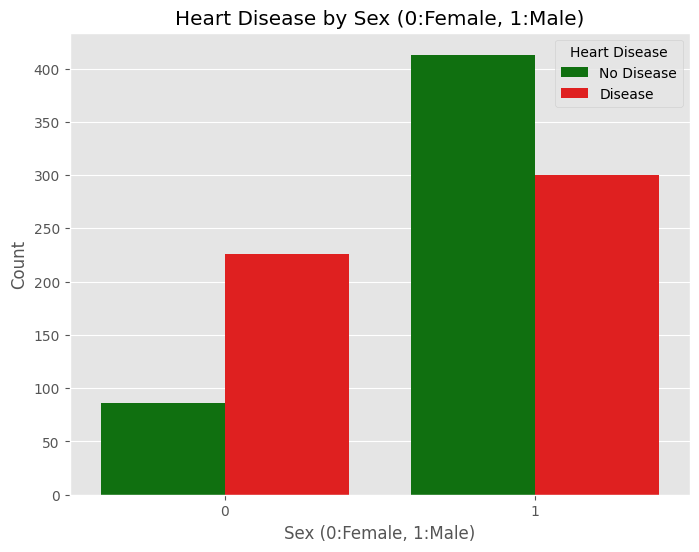

In [16]:
plt.figure(figsize=(8, 6))

sns.countplot(x='sex', hue='target', data=df, palette={0:'green', 1:'red'})

plt.title('Heart Disease by Sex (0:Female, 1:Male)')
plt.xlabel('Sex (0:Female, 1:Male)')
plt.ylabel('Count')

plt.legend(title='Heart Disease', labels=['No Disease', 'Disease'])

plt.show()

In [17]:
df['age_group'] = (df['age'] // 10) * 10
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group
0,52,1,0,125,212.0,0,1,168.0,0,1.0,2,2.0,3.0,0,50
1,53,1,0,140,203.0,1,0,155.0,1,3.1,0,0.0,3.0,0,50
2,70,1,0,145,174.0,0,1,125.0,1,2.6,0,0.0,3.0,0,70
3,61,1,0,148,203.0,0,1,161.0,0,0.0,2,1.0,3.0,0,60
4,62,0,0,138,294.0,1,1,106.0,0,1.9,1,2.5,2.0,0,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221.0,0,1,164.0,1,0.0,2,0.0,2.0,1,50
1021,60,1,0,125,258.0,0,0,141.0,1,2.8,1,1.0,3.0,0,60
1022,47,1,0,110,275.0,0,0,118.0,1,1.0,1,1.0,2.0,0,40
1023,50,0,0,110,254.0,0,0,159.0,0,0.0,2,0.0,2.0,1,50


In [18]:
thalach_comparison =pd.pivot_table(df, values='thalach', index='age_group', columns='target', aggfunc='mean')
thalach_comparison

target,0,1
age_group,,
30,151.733333,178.000000
40,142.712500,166.140127
50,138.171296,157.572816
60,139.011494,146.039604
70,125.571429,132.300000


In [19]:
thalach_comparison.columns = ['No Disease (0)', 'Disease (1)']
thalach_comparison

,No Disease (0),Disease (1)
age_group,,
30,151.733333,178.000000
40,142.712500,166.140127
50,138.171296,157.572816
60,139.011494,146.039604
70,125.571429,132.300000


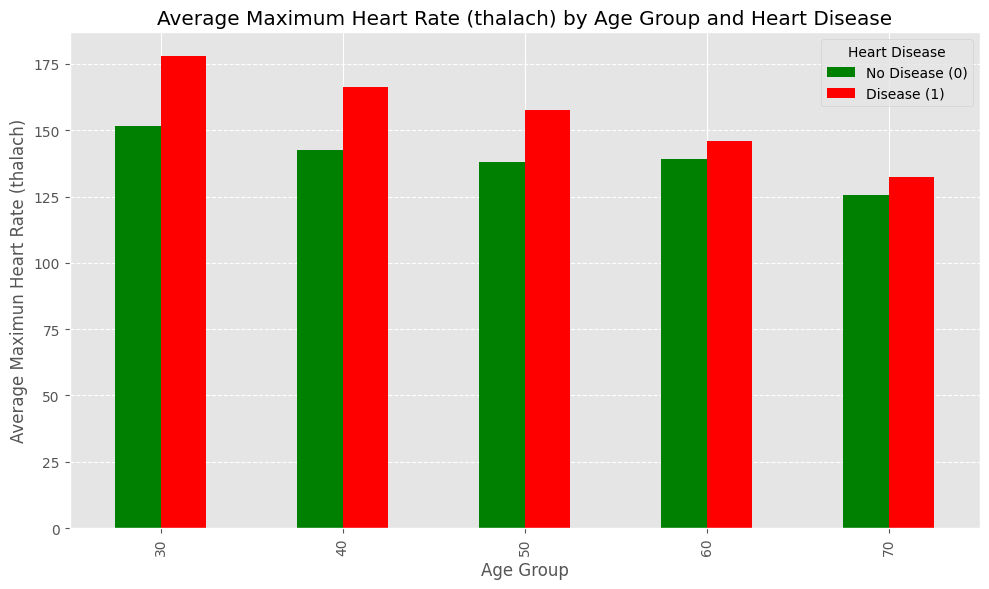

In [20]:
thalach_comparison.plot(kind='bar', figsize=(10, 6), color=['green', 'red'])

plt.title('Average Maximum Heart Rate (thalach) by Age Group and Heart Disease')
plt.xlabel('Age Group')
plt.ylabel('Average Maximun Heart Rate (thalach)')

plt.legend(title='Heart Disease')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

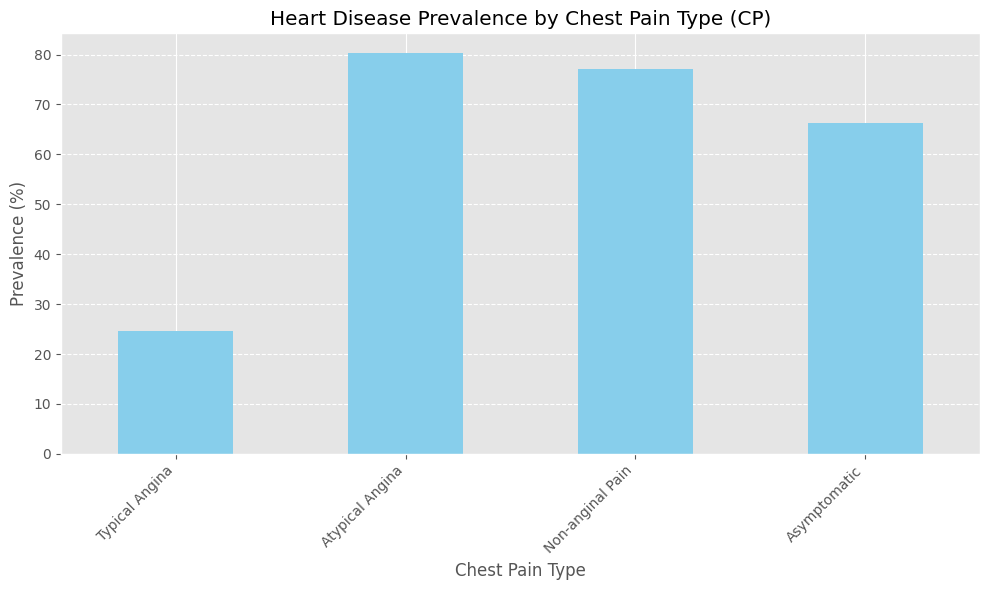


Heart Disease Prevalence by Chest Pain Type (%):
cp
Typical Angina      24.55
Atypical Angina     80.24
Non-anginal Pain    77.11
Asymptomatic        66.23
Name: 1, dtype: float64


In [21]:
# 'cp'와 'target' 변수를 사용하여 심장병 유병률 계산
# 'target'은 심장병 유무 (1: 있음, 0: 없음)
cp_prevalence = df.groupby('cp')['target'].value_counts(normalize=True).unstack()

# 심장병이 있는 경우(target=1)의 유병률만 추출
cp_prevalence_heart_disease = cp_prevalence[1] * 100 # 퍼센트로 변환

# 가슴 통증 유형(cp) 라벨 매핑 (데이터 설명에 따른 추측)
# 실제 데이터의 'cp' 값과 의미에 따라 조정될 수 있습니다.
# 예를 들어, 0: typical angina, 1: atypical angina, 2: non-anginal pain, 3: asymptomatic
cp_labels = {
    0: 'Typical Angina',
    1: 'Atypical Angina',
    2: 'Non-anginal Pain',
    3: 'Asymptomatic'
}
cp_prevalence_heart_disease.index = cp_prevalence_heart_disease.index.map(cp_labels)


# 막대 그래프 생성
plt.figure(figsize=(10, 6))
cp_prevalence_heart_disease.plot(kind='bar', color='skyblue')

plt.title('Heart Disease Prevalence by Chest Pain Type (CP)')
plt.xlabel('Chest Pain Type')
plt.ylabel('Prevalence (%)')
plt.xticks(rotation=45, ha='right') # x축 라벨 회전
plt.grid(axis='y', linestyle='--')
plt.tight_layout() # 라벨이 잘리지 않도록 자동 조정
plt.show()

# 결과 출력 (데이터프레임 형태)
print("\nHeart Disease Prevalence by Chest Pain Type (%):")
print(cp_prevalence_heart_disease.round(2))

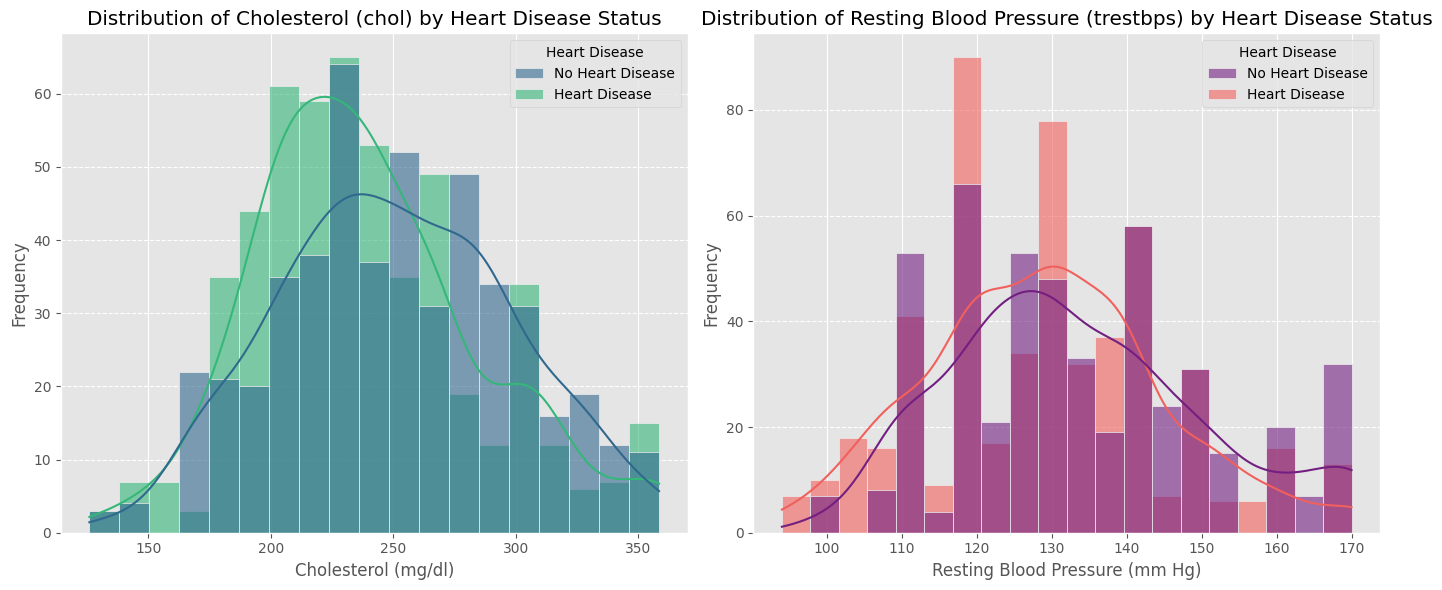

In [22]:
# 'target' 컬럼의 값에 따라 심장병 유무 라벨링
df['Heart Disease'] = df['target'].map({0: 'No Heart Disease', 1: 'Heart Disease'})

# ----------------------------------------------------------------------
# 1. 'chol' (콜레스테롤) 분포 비교 시각화
# ----------------------------------------------------------------------
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1) # 1행 2열 중 첫 번째 플롯
sns.histplot(data=df, x='chol', hue='Heart Disease', kde=True, palette='viridis', alpha=0.6)
plt.title('Distribution of Cholesterol (chol) by Heart Disease Status')
plt.xlabel('Cholesterol (mg/dl)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--')

# ----------------------------------------------------------------------
# 2. 'trestbps' (휴식기 혈압) 분포 비교 시각화
# ----------------------------------------------------------------------
plt.subplot(1, 2, 2) # 1행 2열 중 두 번째 플롯
sns.histplot(data=df, x='trestbps', hue='Heart Disease', kde=True, palette='magma', alpha=0.6)
plt.title('Distribution of Resting Blood Pressure (trestbps) by Heart Disease Status')
plt.xlabel('Resting Blood Pressure (mm Hg)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--')

plt.tight_layout() # 서브플롯 간의 간격 자동 조절
plt.show()

In [23]:
# ----------------------------------------------------------------------
# 추가 분석: 평균 값 비교 (선택 사항)
# ----------------------------------------------------------------------
print("\n--- Average Cholesterol and Resting Blood Pressure by Heart Disease Status ---")
print(df.groupby('Heart Disease')[['chol', 'trestbps']].mean().round(2))


--- Average Cholesterol and Resting Blood Pressure by Heart Disease Status ---
                    chol  trestbps
Heart Disease                     
Heart Disease     239.26    129.13
No Heart Disease  250.60    133.51


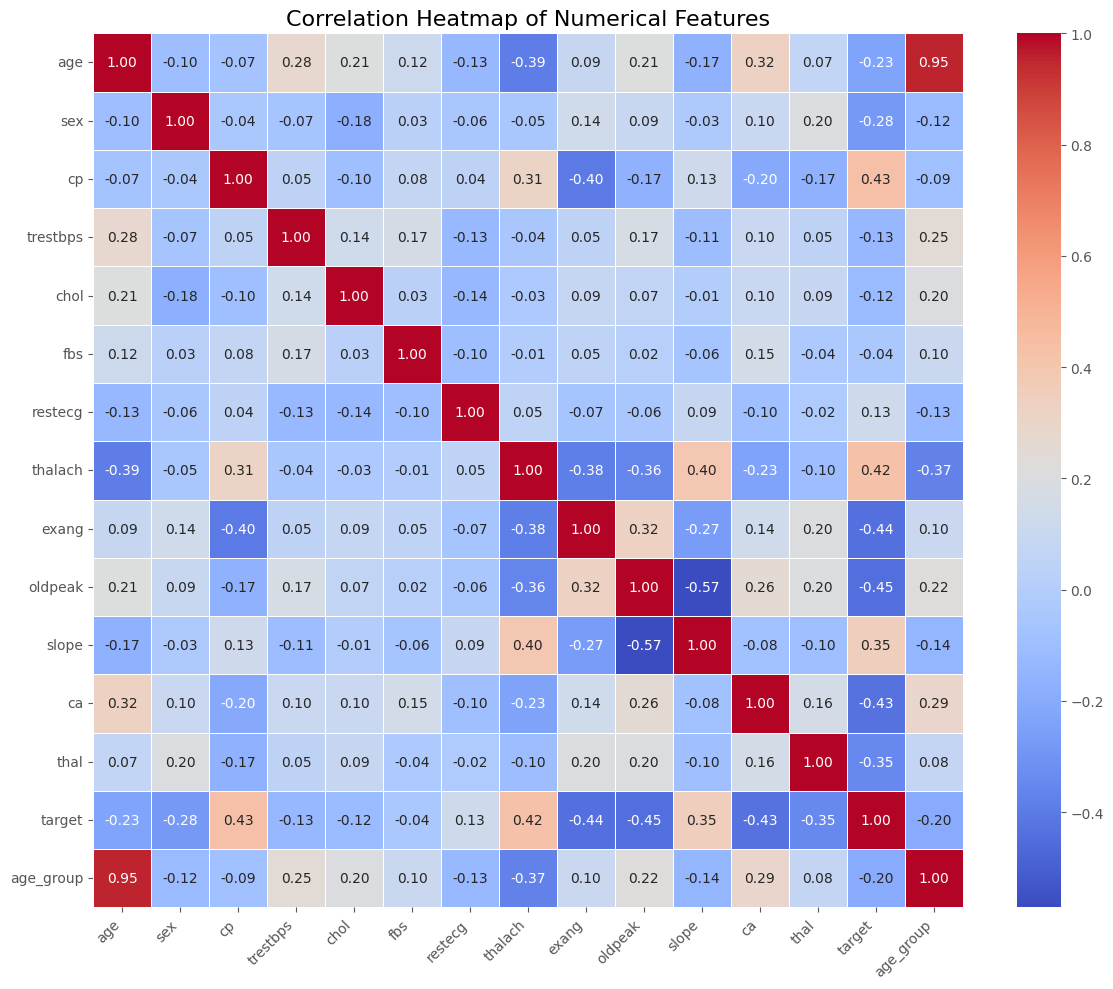


--- Correlation Matrix ---
            age   sex    cp  trestbps  chol   fbs  restecg  thalach  exang  \
age        1.00 -0.10 -0.07      0.28  0.21  0.12    -0.13    -0.39   0.09   
sex       -0.10  1.00 -0.04     -0.07 -0.18  0.03    -0.06    -0.05   0.14   
cp        -0.07 -0.04  1.00      0.05 -0.10  0.08     0.04     0.31  -0.40   
trestbps   0.28 -0.07  0.05      1.00  0.14  0.17    -0.13    -0.04   0.05   
chol       0.21 -0.18 -0.10      0.14  1.00  0.03    -0.14    -0.03   0.09   
fbs        0.12  0.03  0.08      0.17  0.03  1.00    -0.10    -0.01   0.05   
restecg   -0.13 -0.06  0.04     -0.13 -0.14 -0.10     1.00     0.05  -0.07   
thalach   -0.39 -0.05  0.31     -0.04 -0.03 -0.01     0.05     1.00  -0.38   
exang      0.09  0.14 -0.40      0.05  0.09  0.05    -0.07    -0.38   1.00   
oldpeak    0.21  0.09 -0.17      0.17  0.07  0.02    -0.06    -0.36   0.32   
slope     -0.17 -0.03  0.13     -0.11 -0.01 -0.06     0.09     0.40  -0.27   
ca         0.32  0.10 -0.20      0.1

In [24]:
# 숫자형 변수만 선택하여 상관관계 계산
# 'target' 변수도 분석에 포함하여 다른 변수들이 심장병 유무와 어떤 상관관계를 가지는지 확인합니다.
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numeric_cols].corr()

# 상관관계 히트맵 생성
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print("\n--- Correlation Matrix ---")
print(correlation_matrix.round(2))

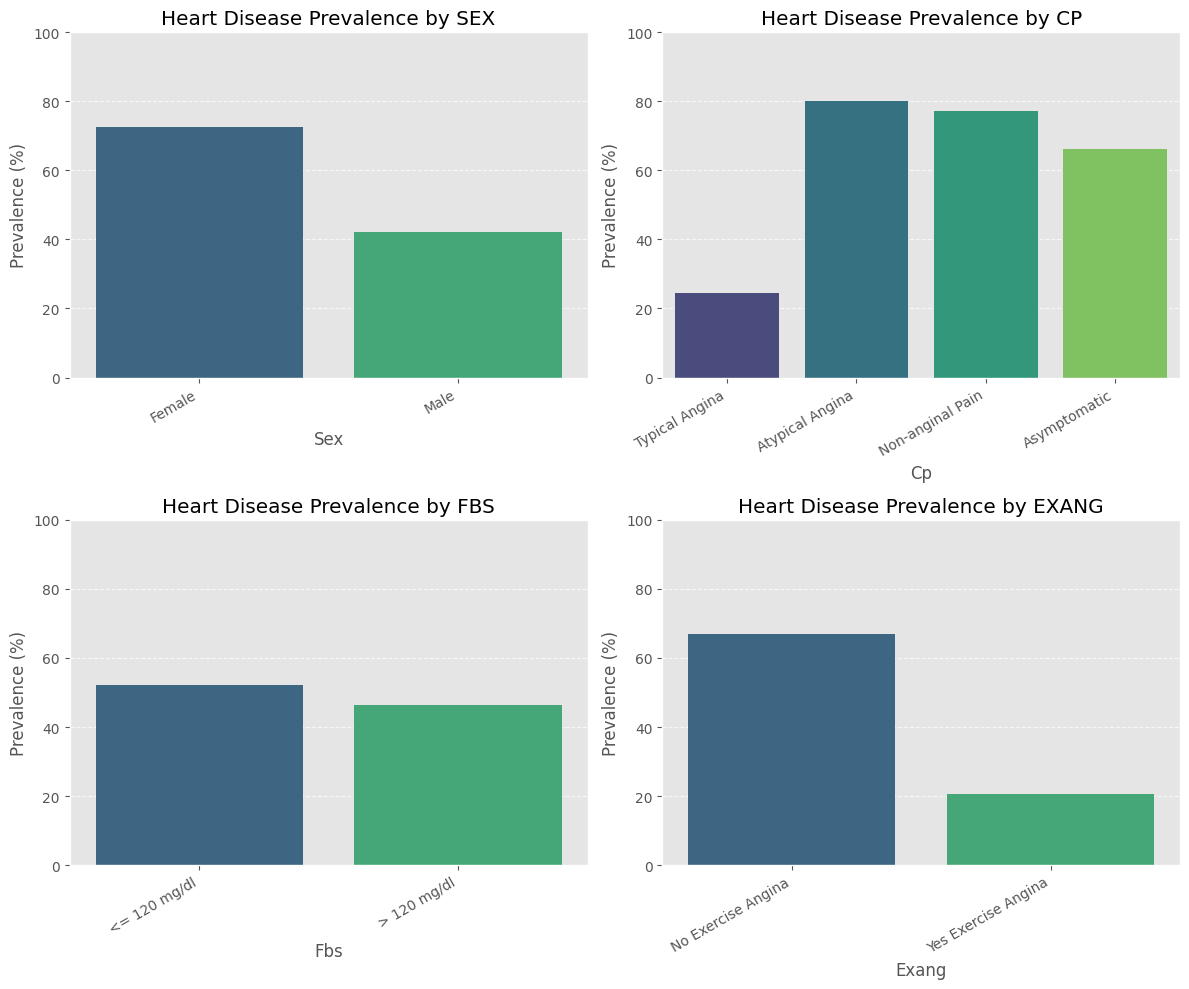


--- Heart Disease Prevalence by Categorical Variables (%) ---

SEX:
sex
Female    72.44
Male      42.08
Name: target, dtype: float64

CP:
cp
Typical Angina      24.55
Atypical Angina     80.24
Non-anginal Pain    77.11
Asymptomatic        66.23
Name: target, dtype: float64

FBS:
fbs
<= 120 mg/dl    52.18
> 120 mg/dl     46.41
Name: target, dtype: float64

EXANG:
exang
No Exercise Angina     66.91
Yes Exercise Angina    20.58
Name: target, dtype: float64


In [26]:
# 'target' 컬럼의 값에 따라 심장병 유무 라벨링 (시각화 목적)
df['Heart Disease Status'] = df['target'].map({0: 'No Heart Disease', 1: 'Heart Disease'})

# 분석할 범주형 변수 리스트
categorical_vars = ['sex', 'cp', 'fbs', 'exang']

# 각 변수의 의미에 대한 라벨 맵 (데이터셋 설명에 기반한 추측)
# 실제 데이터의 값과 의미에 따라 조정될 수 있습니다.
labels_map = {
    'sex': {0: 'Female', 1: 'Male'},
    'cp': {0: 'Typical Angina', 1: 'Atypical Angina', 2: 'Non-anginal Pain', 3: 'Asymptomatic'},
    'fbs': {0: '<= 120 mg/dl', 1: '> 120 mg/dl'},
    'exang': {0: 'No Exercise Angina', 1: 'Yes Exercise Angina'}
}

# 그래프 크기 설정 (서브플롯 개수에 따라 유연하게 조절)
n_vars = len(categorical_vars)
n_cols = 2 # 한 줄에 그릴 플롯 수
n_rows = (n_vars + n_cols - 1) // n_cols # 필요한 행 수 계산

plt.figure(figsize=(n_cols * 6, n_rows * 5)) # 전체 figure 크기

# 각 범주형 변수에 대해 반복하며 유병률 막대 그래프 생성
for i, var in enumerate(categorical_vars):
    plt.subplot(n_rows, n_cols, i + 1) # 서브플롯 위치 지정

    # 범주별 심장병 유병률 계산
    # 각 범주에서 target=1 (Heart Disease)인 비율
    prevalence = df.groupby(var)['target'].mean() * 100

    # 라벨 매핑 적용 (만약 labels_map에 해당 변수가 있다면)
    if var in labels_map:
        prevalence.index = prevalence.index.map(labels_map[var])
        # 인덱스 순서 재정렬 (매핑 후 정렬이 필요할 수 있음)
        if var == 'fbs': # fbs는 0, 1 순서가 의미 있으므로 수동 정렬
             prevalence = prevalence.reindex(['<= 120 mg/dl', '> 120 mg/dl'])
        elif var == 'sex': # sex는 Male, Female 순서가 더 일반적일 수 있음
             prevalence = prevalence.reindex(['Female', 'Male'])
        elif var == 'exang': # exang도 의미 있는 순서
             prevalence = prevalence.reindex(['No Exercise Angina', 'Yes Exercise Angina'])


    sns.barplot(x=prevalence.index, y=prevalence.values, palette='viridis')

    plt.title(f'Heart Disease Prevalence by {var.upper()}')
    plt.xlabel(var.replace('_', ' ').title()) # 변수명 보기 좋게 변환
    plt.ylabel('Prevalence (%)')
    plt.ylim(0, 100) # 유병률은 0%에서 100% 사이
    plt.xticks(rotation=30, ha='right') # x축 라벨 회전
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout() # 서브플롯 간의 간격 자동 조절
plt.show()

print("\n--- Heart Disease Prevalence by Categorical Variables (%) ---")
for var in categorical_vars:
    prevalence = df.groupby(var)['target'].mean() * 100
    if var in labels_map:
        prevalence.index = prevalence.index.map(labels_map[var])
    print(f"\n{var.upper()}:")
    print(prevalence.round(2))

In [27]:
X = df.loc[:, "age":"thal"]
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212.0,0,1,168.0,0,1.0,2,2.0,3.0
1,53,1,0,140,203.0,1,0,155.0,1,3.1,0,0.0,3.0
2,70,1,0,145,174.0,0,1,125.0,1,2.6,0,0.0,3.0
3,61,1,0,148,203.0,0,1,161.0,0,0.0,2,1.0,3.0
4,62,0,0,138,294.0,1,1,106.0,0,1.9,1,2.5,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221.0,0,1,164.0,1,0.0,2,0.0,2.0
1021,60,1,0,125,258.0,0,0,141.0,1,2.8,1,1.0,3.0
1022,47,1,0,110,275.0,0,0,118.0,1,1.0,1,1.0,2.0
1023,50,0,0,110,254.0,0,0,159.0,0,0.0,2,0.0,2.0


In [28]:
y = df[['target']]
y

,target
0,0
1,0
2,0
3,0
4,0
...,...
1020,1
1021,0
1022,0
1023,1


In [29]:
import torch
import torch.nn.functional as F
import torch.optim as optim

In [30]:
X_mean = X.mean()
X_mean

age          54.438049
sex           0.695610
cp            0.942439
trestbps    131.260488
chol        244.781951
fbs           0.149268
restecg       0.529756
thalach     149.170732
exang         0.336585
oldpeak       1.056098
slope         1.385366
ca            0.694146
thal          2.327317
dtype: float64

In [31]:
X_std = X.std()
X_std

age          9.061547
sex          0.460373
cp           1.029641
trestbps    16.532208
chol        47.242642
fbs          0.356527
restecg      0.527878
thalach     22.830518
exang        0.472772
oldpeak      1.124768
slope        0.617755
ca           0.890414
thal         0.609123
dtype: float64

In [33]:
X_norm = (X - X_mean) / X_std
X_norm

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,-0.269054,0.661181,-0.915309,-0.378684,-0.693906,-0.418674,0.890820,0.824741,-0.711940,-0.049875,0.994948,1.466569,1.104347
1,-0.158698,0.661181,-0.915309,0.528635,-0.884412,2.386166,-1.003559,0.255328,1.403243,1.817178,-2.242580,-0.779577,1.104347
2,1.717361,0.661181,-0.915309,0.831075,-1.498264,-0.418674,0.890820,-1.058703,1.403243,1.372641,-2.242580,-0.779577,1.104347
3,0.724154,0.661181,-0.915309,1.012539,-0.884412,-0.418674,0.890820,0.518134,-0.711940,-0.938947,0.994948,0.343496,1.104347
4,0.834510,-1.510969,-0.915309,0.407660,1.041814,2.386166,0.890820,-1.890922,-0.711940,0.750291,-0.623816,2.028106,-0.537358
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.503441,0.661181,0.055904,0.528635,-0.503400,-0.418674,0.890820,0.649537,1.403243,-0.938947,0.994948,-0.779577,-0.537358
1021,0.613797,0.661181,-0.915309,-0.378684,0.279791,-0.418674,-1.003559,-0.357886,1.403243,1.550456,-0.623816,0.343496,1.104347
1022,-0.820837,0.661181,-0.915309,-1.286004,0.639635,-0.418674,-1.003559,-1.365310,1.403243,-0.049875,-0.623816,0.343496,-0.537358
1023,-0.489767,-1.510969,-0.915309,-1.286004,0.195121,-0.418674,-1.003559,0.430532,-0.711940,-0.938947,0.994948,-0.779577,-0.537358


In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [36]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
835,49,1,2,118,149.0,0,0,126.0,0,0.8,2,2.5,2.0
137,64,0,0,170,325.0,0,1,154.0,1,0.0,2,0.0,2.0
534,54,0,2,108,267.0,0,0,167.0,0,0.0,2,0.0,2.0
495,59,1,0,135,234.0,0,1,161.0,0,0.5,1,0.0,3.0
244,51,1,2,125,245.0,1,0,166.0,0,2.4,1,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,41,1,2,130,214.0,0,0,168.0,0,2.0,1,0.0,2.0
71,61,1,0,140,207.0,0,0,138.0,1,1.9,2,1.0,3.0
106,51,1,0,140,299.0,0,1,173.0,1,1.6,2,0.0,3.0
270,43,1,0,110,211.0,0,1,161.0,0,0.0,2,0.0,3.0


In [37]:
y_train

,target
835,0
137,1
534,1
495,1
244,1
...,...
700,1
71,0
106,0
270,1


In [38]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
527,62,0,0,124,209.0,0,1,163.0,0,0.0,2,0.0,2.0
359,53,0,2,128,216.0,0,0,115.0,0,0.0,2,0.0,0.5
447,55,1,0,160,289.0,0,0,145.0,1,0.8,1,1.0,3.0
31,50,0,1,120,244.0,0,1,162.0,0,1.1,2,0.0,2.0
621,48,1,0,130,256.0,1,0,150.0,1,0.0,2,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
832,68,1,2,118,277.0,0,1,151.0,0,1.0,2,1.0,3.0
796,41,1,1,135,203.0,0,1,132.0,0,0.0,1,0.0,1.0
644,44,1,2,120,226.0,0,1,169.0,0,0.0,2,0.0,2.0
404,61,1,0,140,207.0,0,0,138.0,1,1.9,2,1.0,3.0


In [39]:
y_test

,target
527,1
359,1
447,0
31,1
621,0
...,...
832,1
796,1
644,1
404,0


In [40]:
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
X_train_tensor

tensor([[49.0000,  1.0000,  2.0000,  ...,  2.0000,  2.5000,  2.0000],
        [64.0000,  0.0000,  0.0000,  ...,  2.0000,  0.0000,  2.0000],
        [54.0000,  0.0000,  2.0000,  ...,  2.0000,  0.0000,  2.0000],
        ...,
        [51.0000,  1.0000,  0.0000,  ...,  2.0000,  0.0000,  3.0000],
        [43.0000,  1.0000,  0.0000,  ...,  2.0000,  0.0000,  3.0000],
        [52.0000,  1.0000,  0.0000,  ...,  2.0000,  1.0000,  2.0000]])

In [41]:
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
y_train_tensor

tensor([[0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
      

In [42]:
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
X_test_tensor

tensor([[62.0000,  0.0000,  0.0000,  ...,  2.0000,  0.0000,  2.0000],
        [53.0000,  0.0000,  2.0000,  ...,  2.0000,  0.0000,  0.5000],
        [55.0000,  1.0000,  0.0000,  ...,  1.0000,  1.0000,  3.0000],
        ...,
        [44.0000,  1.0000,  2.0000,  ...,  2.0000,  0.0000,  2.0000],
        [61.0000,  1.0000,  0.0000,  ...,  2.0000,  1.0000,  3.0000],
        [58.0000,  1.0000,  2.0000,  ...,  1.0000,  1.0000,  3.0000]])

In [43]:
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)
y_test_tensor

tensor([[1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
      

In [45]:
input_dim = X_train.shape[1]
input_dim

13

In [46]:
linear = torch.nn.Linear(input_dim, 1)
linear

Linear(in_features=13, out_features=1, bias=True)

In [47]:
optimizer = optim.Adam(linear.parameters(), lr=0.01)
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    weight_decay: 0
)

In [48]:
loss_fn = torch.nn.BCELoss()
loss_fn

BCELoss()

In [51]:
epochs = 1000

for epoch in range(epochs):
    z = linear(X_train_tensor)
    y_pred = torch.sigmoid(z)
    loss = loss_fn(y_pred, y_train_tensor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print(f"Epoch {epoch+1}/{epoch}, Loss: {loss.item():.4f}")

Epoch 1/0, Loss: 40.6156
Epoch 2/1, Loss: 29.5789
Epoch 3/2, Loss: 15.6668
Epoch 4/3, Loss: 3.7939
Epoch 5/4, Loss: 1.7784
Epoch 6/5, Loss: 1.6669
Epoch 7/6, Loss: 2.5801
Epoch 8/7, Loss: 3.1307
Epoch 9/8, Loss: 3.0043
Epoch 10/9, Loss: 2.4655
Epoch 11/10, Loss: 1.8722
Epoch 12/11, Loss: 1.5336
Epoch 13/12, Loss: 1.5309
Epoch 14/13, Loss: 1.7682
Epoch 15/14, Loss: 2.0235
Epoch 16/15, Loss: 2.1321
Epoch 17/16, Loss: 2.0577
Epoch 18/17, Loss: 1.8495
Epoch 19/18, Loss: 1.6071
Epoch 20/19, Loss: 1.4459
Epoch 21/20, Loss: 1.4218
Epoch 22/21, Loss: 1.5029
Epoch 23/22, Loss: 1.6131
Epoch 24/23, Loss: 1.6692
Epoch 25/24, Loss: 1.6317
Epoch 26/25, Loss: 1.5235
Epoch 27/26, Loss: 1.4041
Epoch 28/27, Loss: 1.3273
Epoch 29/28, Loss: 1.3148
Epoch 30/29, Loss: 1.3526
Epoch 31/30, Loss: 1.3964
Epoch 32/31, Loss: 1.4025
Epoch 33/32, Loss: 1.3587
Epoch 34/33, Loss: 1.2875
Epoch 35/34, Loss: 1.2267
Epoch 36/35, Loss: 1.2010
Epoch 37/36, Loss: 1.2074
Epoch 38/37, Loss: 1.2232
Epoch 39/38, Loss: 1.2233
Ep

In [52]:
with torch.no_grad():
    z_test = linear(X_test_tensor)
    y_test_pred = torch.sigmoid(z_test)
    y_test_pred_label = (y_test_pred >= 0.5).float()
    accuracy = (y_test_pred_label == y_test_tensor).float().mean()
    print(f"\n테스트 정확도: {accuracy.item() * 100}%")


테스트 정확도: 80.0000011920929%


In [54]:
new_patient_1 = pd.DataFrame({
    'age': [59],
    'sex': [0],
    'cp': [0],
    'trestbps': [98],
    'chol': [253],
    'fbs': [0],
    'restecg': [0],
    'thalach': [119],
    'exang': [0],
    'oldpeak': [1.0],
    'slope': [1],
    'ca': [0],
    'thal': [2]
})

new_patient_1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,59,0,0,98,253,0,0,119,0,1.0,1,0,2


In [55]:
with torch.no_grad():
    new_patient_1_norm = (new_patient_1 - X_mean) / X_std
    patient1_tensor = torch.tensor(new_patient_1_norm.values, dtype=torch.float32)
    pred1 = torch.sigmoid(linear(patient1_tensor))
    print(f"\n환자 1의 심장병 예측 확률: {pred1.item():.4f}")


환자 1의 심장병 예측 확률: 0.9592
